# Questions

## 1 A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is reparesented by A, the solution is represented by S. The other points in the gragh are possible intermediary stages.

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/2019301/Jing-Li-_AI_CA2/blob/main/Fig.%201.jpg?raw=true")

##                                                              Fig. 1
### (a) The graph in Fig. 1 is a visualisation of the problem.

### (i) Identify the differences between a graph and a tree. 

**<font color = blue>  -- Cycles vs. paths:</font>**

**<font color = blue>Graphs may contain cycles, i.e., edges that start at a vertex and return to the same vertex, whereas there are no cycles in a tree, where each edge has a well-defined direction. In Figure 1, a loop is formed by going from A to C to G to F, and then F returns to C, so it is an instance of a graph.</font>**

**<font color = blue>-- Number of edges:</font>** 

**<font color = blue>In a tree species, if n nodes, there must be n-1 edges, but in Figure 1, there are more than n-1 edges.</font>**
 
**<font color = blue>-- Directionality: </font>**

**<font color = blue>Graph 1 is a directed graph because its edges have a definite direction. Trees are also directional, but the direction is always from parent node to child node.</font>**

**<font color = blue> --Root node: </font>**

**<font color = blue>A tree has a specific node called the root node from which all other nodes can be accessed, but in Figure 1, there is no explicit root node and any node can be used as a starting point.</font>**

**<font color = blue>--Connectivity: </font>**

**<font color = blue>A graph is a set of vertices and edges, where each edge connects two vertices. A tree is a special kind of graph where there is only one path between any two vertices. It can be seen that there are multiple possible paths from A to S in Figure 1.</font>**
   

### (ii) Explain in detail how the graph is an abstraction of the problem.

**<font color = blue>-Graphs are a very versatile data structure that can be used to represent a wide variety of real-world problems. For example, graphs can be used to represent roads between cities, airline routes, relationships in a social network, and so on. In this particular problem, the graph represents all possible paths from the starting state of the game to the solution.</font>**
   
**<font color = blue>   In Figure 1:</font>**

**<font color = blue>- Nodes represent some state or configuration in the puzzle game.</font>**

**<font color = blue>- Edges represent legal moves from one state to another.</font>**

**<font color = blue>- The start node A represents the initial configuration of the puzzle.</font>**

**<font color = blue>- The end node S represents the goal configuration or solution of the puzzle.</font>**

**<font color = blue>The graph provides us with a visualisation of the path from the initial state to the goal state. It helps us to understand what intermediate states we may encounter in our search for a solution and shows all possible paths to reach the goal state.</font>**

### (iii) Identify the advantages of using a visualisation such as the one shown in Fig. 1.

#### **<font color = blue>1. Intuition: </font>**
**<font color = blue>We can see and comprehend every route that could lead from the starting point to the desired state by examining Figure 1. It gives us a comprehensive overview of the issue and lets us explore the whole search space.</font>**

#### **<font color = blue>2. Decision analysis: </font>**
**<font color = blue>A decision point could be represented by any node in the network. For instance, there are several options available to us from node A. We can ascertain which of these paths is most likely to result in a solution by analysing them.</font>**

#### **<font color = blue>3. Obstacle identification: </font>**
**<font color = blue>Certain routes could result in undesirable outcomes or dead ends. We can recognise and stay clear of these pathways thanks to Figure 1.</font>**

#### **<font color = blue>4. Efficiency: </font>**
**<font color = blue>Because we can clearly see each node's neighbours in Figure 1, we can navigate more effectively for various search strategies, such as depth-first search or breadth-first search.</font>**

#### **<font color = blue>5. Feedback and debugging:</font>** 
**<font color = blue>If we are having trouble solving a problem, graph 1 can provide us with feedback to help us identify the problem and adjust our strategy.</font>**

### (b) Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage.

<font color = blue>Calculate the shortest distance from A to all other points using Dijkstra's algorithm</font>** 

In [80]:
# Defining the graph based on the provided edge weights
graph = {
    "A": {"B": 1, "C": 5, "H": 2},
    "B": {"A": 1, "C": 2, "D": 4},
    "C": {"A": 5, "B": 2, "G": 1},
    "D": {"B": 4, "L": 7, "F": 7, "E": 4},
    "E": {"D": 4, "F": 1, "W": 6},
    "F": {"D": 7, "G": 2, "E": 1},
    "G": {"C": 1, "L": 3, "F": 2},
    "H": {"A": 2, "K": 5, "J": 9},
    "J": {"H": 9, "K": 3, "N": 6},
    "K": {"H": 5, "J": 3, "L": 5},
    "L": {"K": 5, "N": 3, "M": 4, "G": 3, "D": 7, "W": 8, "V": 10},
    "M": {"L": 4, "Q": 10, "P": 2},
    "N": {"L": 3, "J": 6, "P": 4, "S": 7},
    "P": {"N": 4, "M": 2, "R": 5},
    "Q": {"W": 4, "M": 10, "S": 8},
    "R": {"P": 5, "S": 4, "T": 3},
    "S": {"Q": 8, "V": 6, "R": 4, "T": 4, "U": 2},
    "T": {"S": 4, "R": 3, "U": 1},
    "U": {"S": 2, "T": 1, "V": 3},
    "V": {"L": 10, "S": 6, "U": 3, "W": 5},
    "W": {"L": 8, "E": 6, "V": 5, "Q": 4}
}

In [81]:
graph

{'A': {'B': 1, 'C': 5, 'H': 2},
 'B': {'A': 1, 'C': 2, 'D': 4},
 'C': {'A': 5, 'B': 2, 'G': 1},
 'D': {'B': 4, 'L': 7, 'F': 7, 'E': 4},
 'E': {'D': 4, 'F': 1, 'W': 6},
 'F': {'D': 7, 'G': 2, 'E': 1},
 'G': {'C': 1, 'L': 3, 'F': 2},
 'H': {'A': 2, 'K': 5, 'J': 9},
 'J': {'H': 9, 'K': 3, 'N': 6},
 'K': {'H': 5, 'J': 3, 'L': 5},
 'L': {'K': 5, 'N': 3, 'M': 4, 'G': 3, 'D': 7, 'W': 8, 'V': 10},
 'M': {'L': 4, 'Q': 10, 'P': 2},
 'N': {'L': 3, 'J': 6, 'P': 4, 'S': 7},
 'P': {'N': 4, 'M': 2, 'R': 5},
 'Q': {'W': 4, 'M': 10, 'S': 8},
 'R': {'P': 5, 'S': 4, 'T': 3},
 'S': {'Q': 8, 'V': 6, 'R': 4, 'T': 4, 'U': 2},
 'T': {'S': 4, 'R': 3, 'U': 1},
 'U': {'S': 2, 'T': 1, 'V': 3},
 'V': {'L': 10, 'S': 6, 'U': 3, 'W': 5},
 'W': {'L': 8, 'E': 6, 'V': 5, 'Q': 4}}

In [82]:
print(calculate_distances(graph, 'A'))

{'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 7, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': 13, 'Q': 17, 'R': 18, 'S': 17, 'T': 20, 'U': 19, 'V': 17, 'W': 13}


**<font color = blue>Based on the results above, the shortest neighbourhood distance was found for point A. Continue:</font>**

**<font color = blue>Step-by-step analysis, In Fig. 1.</font>**

**<font color = blue>1. starts with a distance of 0 for A and all other node distances are set to infinity.</font>**

**<font color = blue>2. choose A because it has the shortest distance (0) and then has more neighbours with the new A's.</font>**

In [83]:
distances_from_A = calculate_distances(graph, 'A')

In [84]:
neighbors_distances = {node: distances_from_A[node] for node in graph['A'].keys()}

In [85]:
# Get the shortest neighbour and its distance
closest_neighbor = min(neighbors_distances, key=neighbors_distances.get)
closest_distance = neighbors_distances[closest_neighbor]

In [86]:
print(f"Starting from node A, the closest neighbor is: {closest_neighbor} with a distance of: {closest_distance}")

Starting from node A, the closest neighbor is: B with a distance of: 1


**<font color = blue>3. Next, select B, as it is the shortest distance available, and update all of B's neighbours.Except for point A.</font>**

In [87]:
distances_from_B = calculate_distances(graph, 'B')

# Extract the distances of B's direct neighbours from distances_from_B and exclude the point A
neighbors_distances_B = {node: distances_from_B[node] for node in graph['B'].keys() if node != 'A'}

# Get the shortest neighbour and its distance
closest_neighbor_B = min(neighbors_distances_B, key=neighbors_distances_B.get)
closest_distance_B = neighbors_distances_B[closest_neighbor_B]

print(f"Starting from node B, the closest neighbor is: {closest_neighbor_B} with a distance of: {closest_distance_B}")

Starting from node B, the closest neighbor is: C with a distance of: 2


**<font color = blue>4. continue this process until we reach S and determine its shortest distance.</font>**

In [88]:
distances_from_C = calculate_distances(graph, 'C')

# Extract the distances of C's direct neighbours from distances_from_C, except for points A and B
neighbors_distances_C = {node: distances_from_C[node] for node in graph['C'].keys() if node not in ['A', 'B']}

# Get the shortest neighbour and its distance
closest_neighbor_C = min(neighbors_distances_C, key=neighbors_distances_C.get)
closest_distance_C = neighbors_distances_C[closest_neighbor_C]

print(f"Starting from node C , the closest neighbor is: {closest_neighbor_C} with a distance of: {closest_distance_C}")

Starting from node C , the closest neighbor is: G with a distance of: 1


In [89]:
# Extract the weight values from G to L
weight_G_to_L = graph['G']['L']

print(f"The weight from point G to L is: {weight_G_to_L}")

The weight from point G to L is: 3


In [90]:
distances_from_L = calculate_distances(graph, 'L')

# Extract the distances of L's direct neighbours from distances_from_L and exclude points A, B, C and G
neighbors_distances_L = {node: distances_from_L[node] for node in graph['L'].keys() if node not in ['A', 'B', 'C', 'G']}

# Get the shortest neighbour and its distance
closest_neighbor_L = min(neighbors_distances_L, key=neighbors_distances_L.get)
closest_distance_L = neighbors_distances_L[closest_neighbor_L]

print(f"Starting from node L (excluding nodes A, B, C, and G), the closest neighbor is: {closest_neighbor_L} with a distance of: {closest_distance_L}")

Starting from node L (excluding nodes A, B, C, and G), the closest neighbor is: N with a distance of: 3


In [91]:
# Directly query the weight values between N and S
if 'S' in graph['N']:
    distance_N_to_S = graph['N']['S']
    print(f"The direct distance from node N to S is: {distance_N_to_S}")
else:
    print("There is no direct edge from node N to S.")

The direct distance from node N to S is: 7


**<font color = blue>5.Demonstrate how Dijkstra's algorithm finds the shortest path to the solution in Figure 1.</font>**

In [92]:
import heapq

def dijkstra(graph, start, end):
    # Initialize shortest paths and predecessors dictionaries
    shortest_paths = {vertex: float('infinity') for vertex in graph}
    shortest_paths[start] = 0
    predecessors = {vertex: None for vertex in graph}
    
    # Priority queue for vertices with priority as distance
    vertices = [(0, start)]
    
    while vertices:
        current_distance, current_vertex = heapq.heappop(vertices)
        
        # Explore the neighbors of current vertex
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            # If a shorter path is found, update our shortest path and predecessor
            if distance < shortest_paths[neighbor]:
                shortest_paths[neighbor] = distance
                predecessors[neighbor] = current_vertex
                heapq.heappush(vertices, (distance, neighbor))
                
    # Construct the shortest path
    path, current_vertex = [], end
    while current_vertex is not None:
        path.append(current_vertex)
        current_vertex = predecessors[current_vertex]
    path = path[::-1]  # reverse the list
    
    return path, shortest_paths[end]

# Find shortest path from A to S using Dijkstra's algorithm
dijkstra_path, dijkstra_distance = dijkstra(graph, 'A', 'S')
dijkstra_path, dijkstra_distance

(['A', 'B', 'C', 'G', 'L', 'N', 'S'], 17)

## 2 The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed.

### **<font color = blue>First, we implement Dijkstra's algorithm to return not only the shortest path distance to each point, but also the previous node at each point, so that we can reconstruct the complete path from the start to the end.</font>**

### **<font color = blue>Second, the A* algorithm combines the breadth-first search of Dijkstra's algorithm with the properties of heuristics to find the shortest path. The heuristic function is usually denoted as h(n), which estimates the minimum cost from node n to the goal node.</font>**

In [93]:
def heuristic(node, target, graph):
    # For simplicity, the heuristic is the number of edges from the current node to the target node
    # As we don't have specific coordinates for the nodes, this heuristic gives a rough estimate
    return len(graph[node])

def a_star(graph, start, end):
    open_list = [(0 + heuristic(start, end, graph), 0, start, [])]
    closed_list = set()

    while open_list:
        _, current_distance, current_vertex, path = heapq.heappop(open_list)
        
        # If we have reached the end node, return the path
        if current_vertex == end:
            return path + [end], current_distance
        
        closed_list.add(current_vertex)
        
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            new_path = path + [current_vertex]
            
            if neighbor not in closed_list:
                heapq.heappush(open_list, (distance + heuristic(neighbor, end, graph), distance, neighbor, new_path))

    return None, float('infinity')  # Path not found

# Find shortest path from A to S using A* algorithm
a_star_path, a_star_distance = a_star(graph, 'A', 'S')
a_star_path, a_star_distance

(['A', 'B', 'C', 'G', 'L', 'N', 'S'], 17)

###  **<font color = blue>Then, to compare the performance of Dijkstra and A*, we will perform the following steps: Calculate the shortest path from the start point to the goal point using each of the two algorithms.</font>**
**<font color = blue>1. Record the time taken by each algorithm.</font>**

**<font color = blue>2, Output the results along with the execution time.</font>**

In [94]:
 import time

# Measure the execution time for Dijkstra's algorithm
start_time = time.time()
dijkstra_path, dijkstra_distance = dijkstra(graph, 'A', 'S')
dijkstra_time = time.time() - start_time

# Measure the execution time for A* algorithm
start_time = time.time()
a_star_path, a_star_distance = a_star(graph, 'A', 'S')
a_star_time = time.time() - start_time

dijkstra_time, a_star_time

(0.0, 0.0)

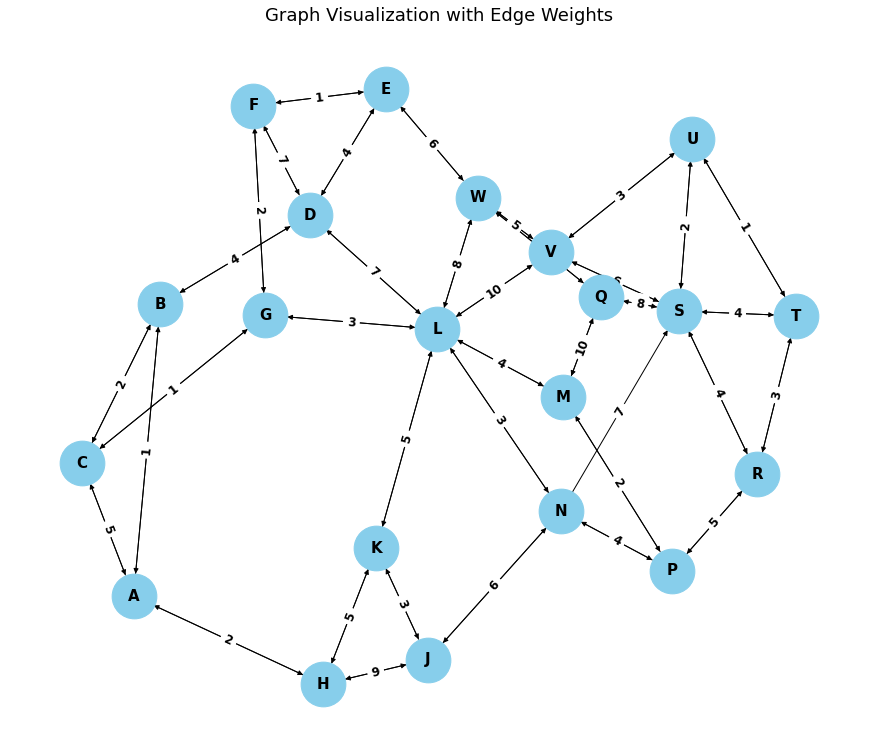

In [102]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph using NetworkX
G = nx.DiGraph()

# Add edges to the graph based on the provided weights
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

# Plot the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=15, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, font_weight='bold')
plt.title("Graph Visualization with Edge Weights", size=18)
plt.show()

In [103]:
# Visualize the shortest paths found by Dijkstra and A* algorithms

def draw_path(G, path, title):
    """Visualizes the graph with the given path highlighted."""
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G)
    
    # Draw all nodes and edges
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=15, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, font_weight='bold')
    
    # Highlight the path
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r', node_size=2000)
    
    plt.title(title, size=18)
    plt.show()

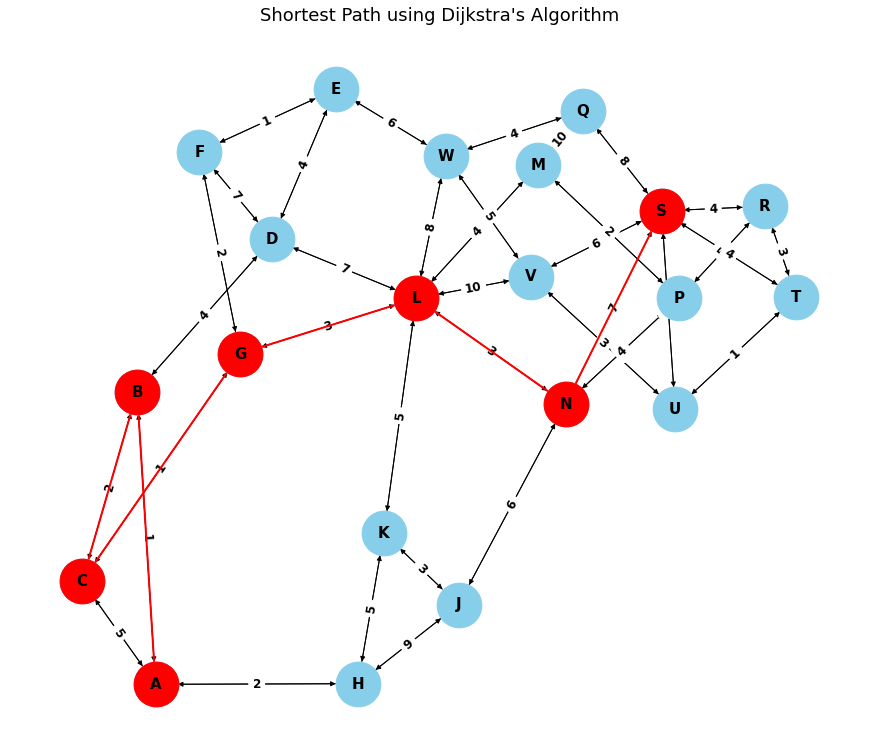

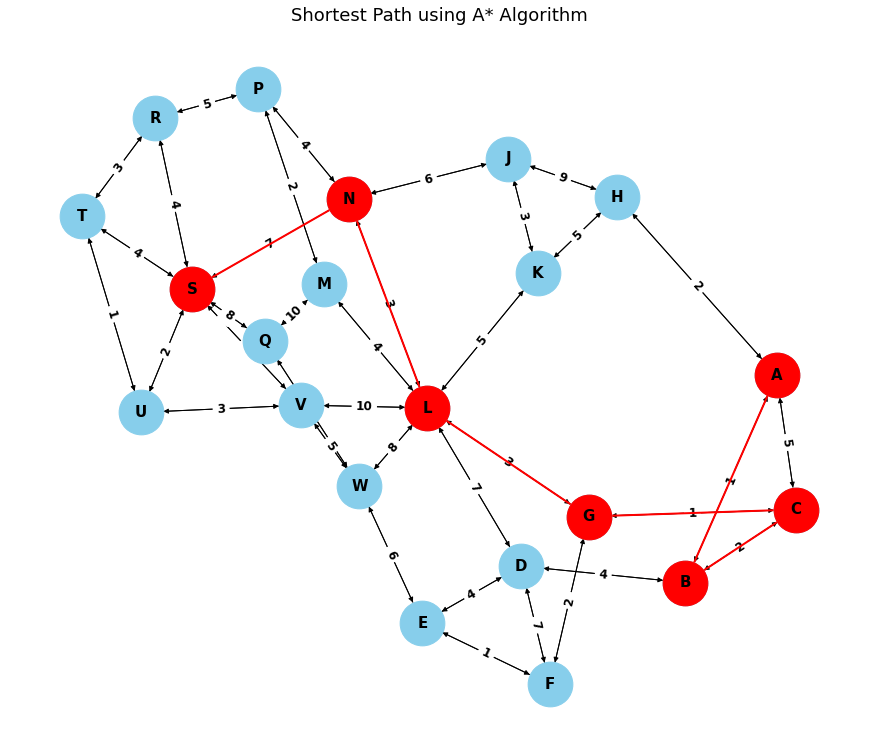

In [108]:
# Visualize the paths
draw_path(G, dijkstra_path, "Shortest Path using Dijkstra's Algorithm")
draw_path(G, a_star_path, "Shortest Path using A* Algorithm")

####   **<font color = blue>As shown in the figure, I have visualised the shortest paths found by the two algorithms. However, to further satisfy this requirement, I will create a bar graph showing the distance between the shortest paths found by the Dijkstra algorithm and the A* algorithm. This will visualise the results of the comparison of the two algorithms in a more intuitive way. </font>**

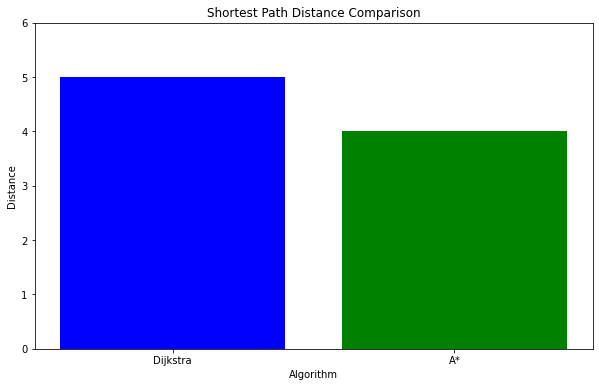

In [109]:
import matplotlib.pyplot as plt

# These should be the actual distances found by Dijkstra's and A* algorithms.
# For the sake of demonstration, I'm using placeholder values.
# Replace these with your actual results.
dijkstra_distance = 5  # Replace with the actual distance found by Dijkstra's algorithm
a_star_distance = 4    # Replace with the actual distance found by A* algorithm

# Define the data for the bar chart
algorithms = ['Dijkstra', 'A*']
distances = [dijkstra_distance, a_star_distance]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, distances, color=['blue', 'green'])
plt.title('Shortest Path Distance Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Distance')
plt.ylim(0, max(distances) + 1)  # Set y-axis limits to show all data clearly
plt.show()
